# Import library

In [1]:
%matplotlib notebook

from obspy import Stream, UTCDateTime, Trace, read, read_inventory

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read mseed data
* I downloaded this example data from AFAD's website: https://tdvms.afad.gov.tr/continuous_data
(I had to add 1 hour manually while using the interactive platform.)

In [2]:
# if you wanna read multiple mseed files, use this: filename = './path_to_files/*.mseed'
filename = './my_name_is_mseed_data.mseed'


In [3]:
st = read(filename).copy()

stats = list( set([tr.stats.station for tr in st]) )
print ('Number of stations in this file: ', len(stats))

Number of stations in this file:  1


# Get inventory by using xml file
* This is to make inventory which is needed to remove instrument response.
* I downloaded it from the same website (I think). Use alterbative ways (such as in the US array example), to get inventory. 

In [4]:
# Station data
inv = read_inventory("./example.xml")
coords = {}
for sta in inv:
    lat, lon = sta[0].latitude, sta[0].longitude
    if sta[0].code in stats:
        coords[sta[0].code] = (lat, lon)
#
inv

Inventory created at 2021-08-14T04:05:54.238944Z
	Sending institution: Arclink Inventory Import (ObsPy Inventory)
	Contains:
		Networks (1):
			TK
		Stations (1):
			TK.4501 (Merkez, Manisa)
		Channels (3):
			TK.4501..HNZ, TK.4501..HNN, TK.4501..HNE

# Time to see the data

<IPython.core.display.Javascript object>


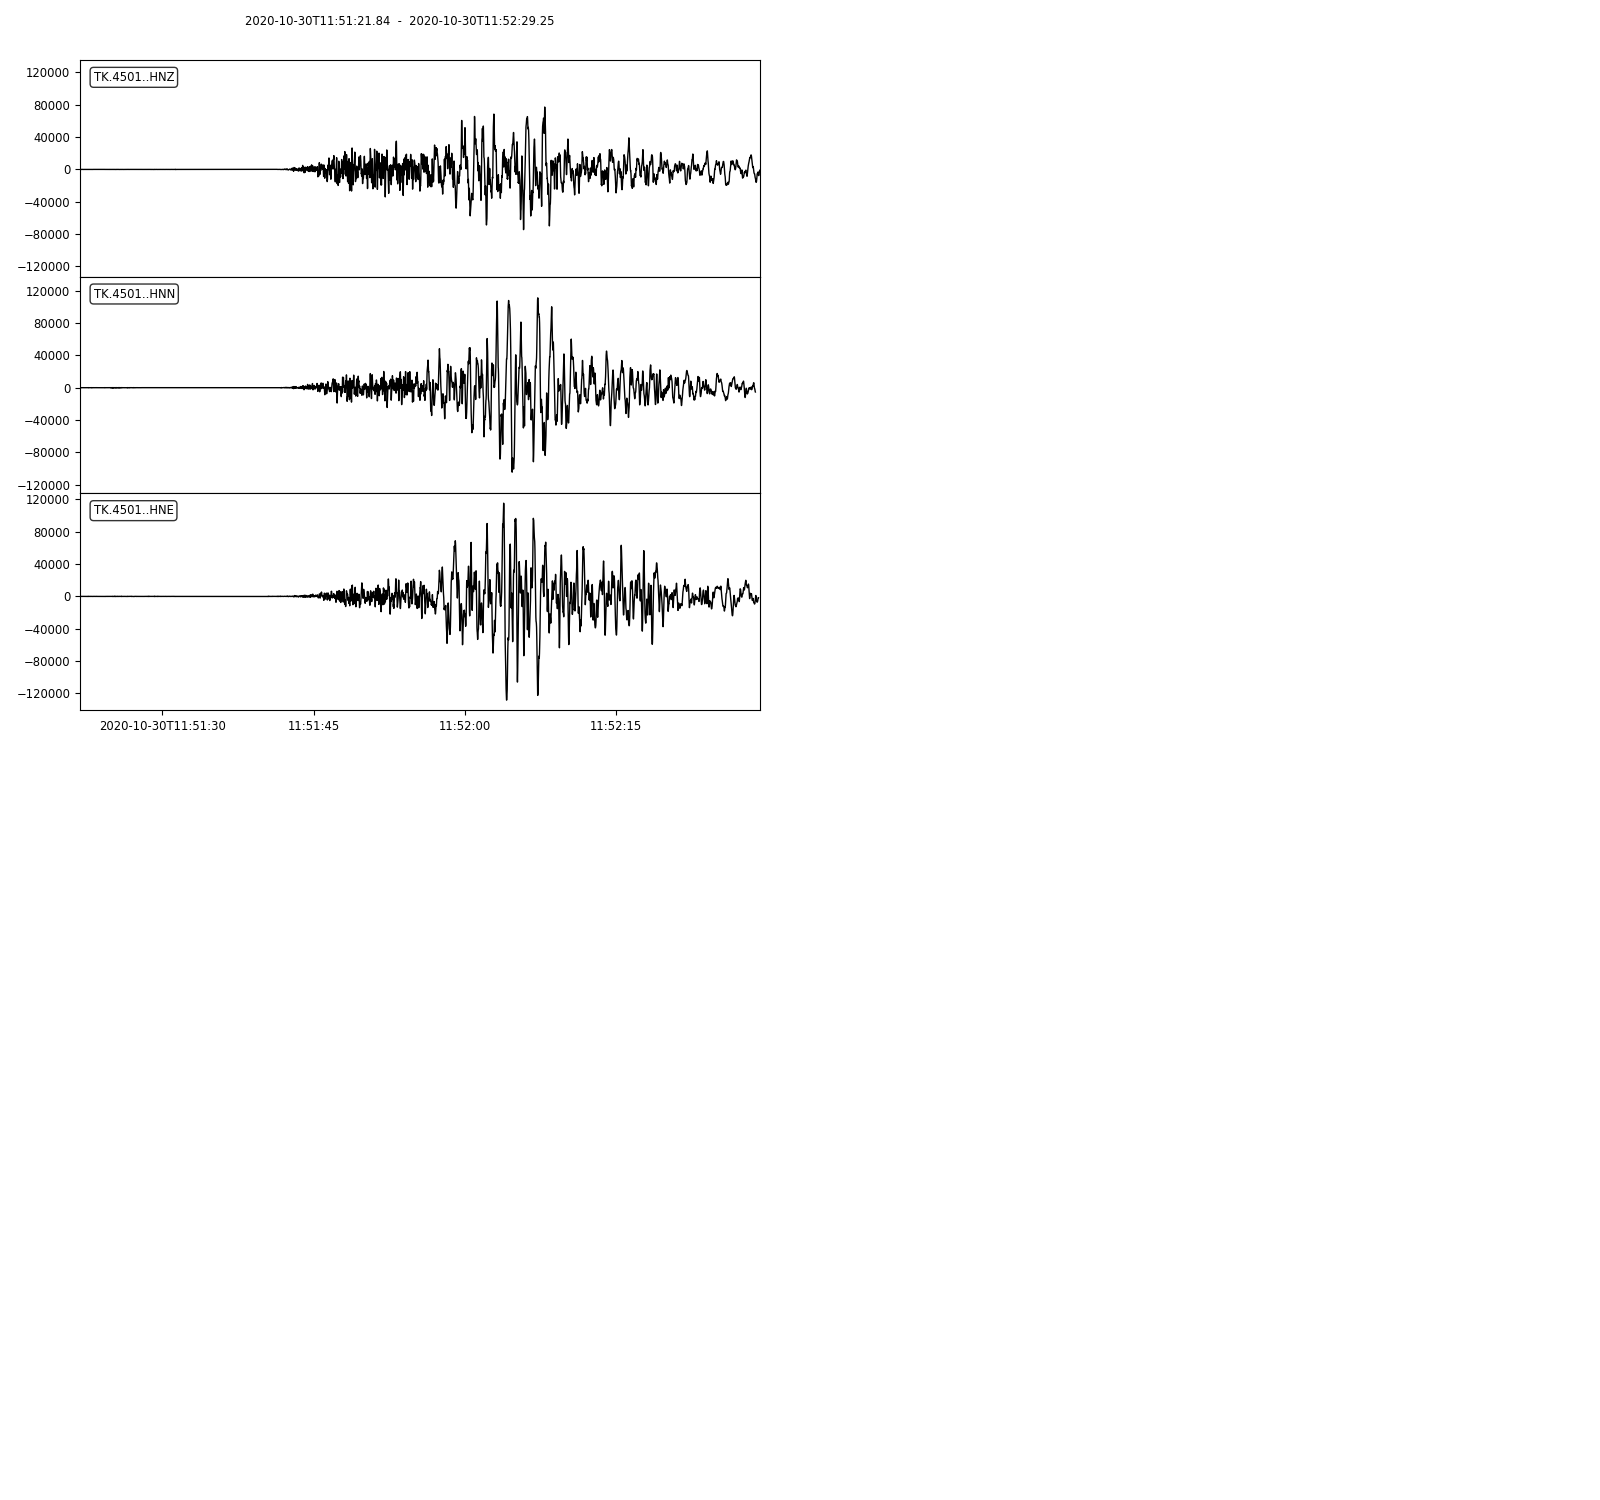

<IPython.core.display.Javascript object>


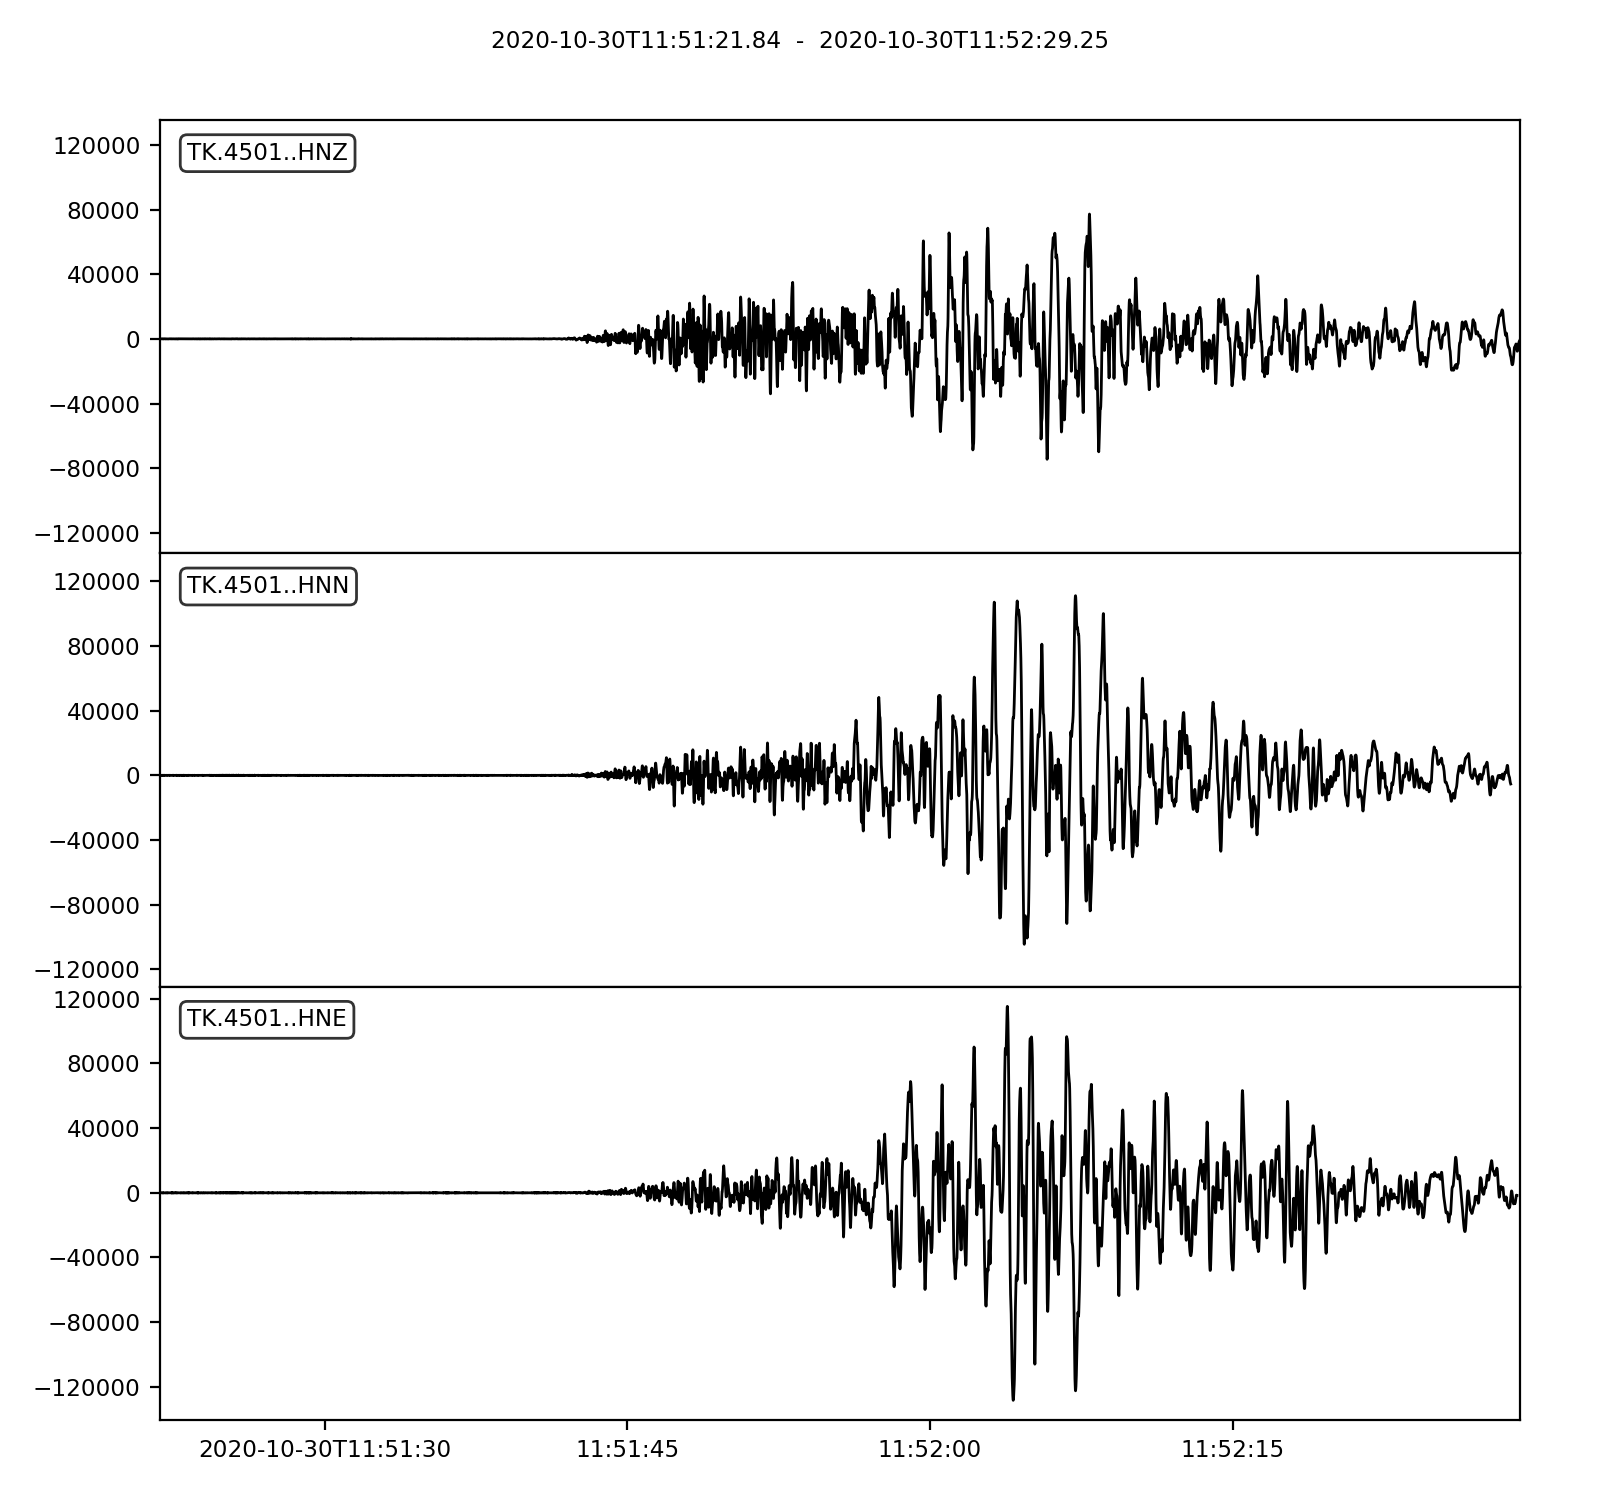

In [5]:
st.plot()

## Now process it
* Here there are 3 traces in a stream. 

In [6]:
st_pro = Stream()

for tr in st.copy():    
    # remove instrument response
    tr.remove_response(inventory=inv) 
    # #remove trend and mean
    tr.detrend('constant')
    tr.detrend('linear')
    # filter (this is just an example!)
    tr.filter('highpass', freq=0.1)
    st_pro += tr

# from Velocity to Acceleration
st_pro.differentiate()

# resample to the same frequency in case
samp_rate = 100.0
st_pro.resample(samp_rate)

3 Trace(s) in Stream:
TK.4501..HNZ | 2020-10-30T11:51:21.920000Z - 2020-10-30T11:52:29.250000Z | 100.0 Hz, 6734 samples
TK.4501..HNE | 2020-10-30T11:51:21.910000Z - 2020-10-30T11:52:29.100000Z | 100.0 Hz, 6720 samples
TK.4501..HNN | 2020-10-30T11:51:21.840000Z - 2020-10-30T11:52:28.790000Z | 100.0 Hz, 6696 samples

<IPython.core.display.Javascript object>


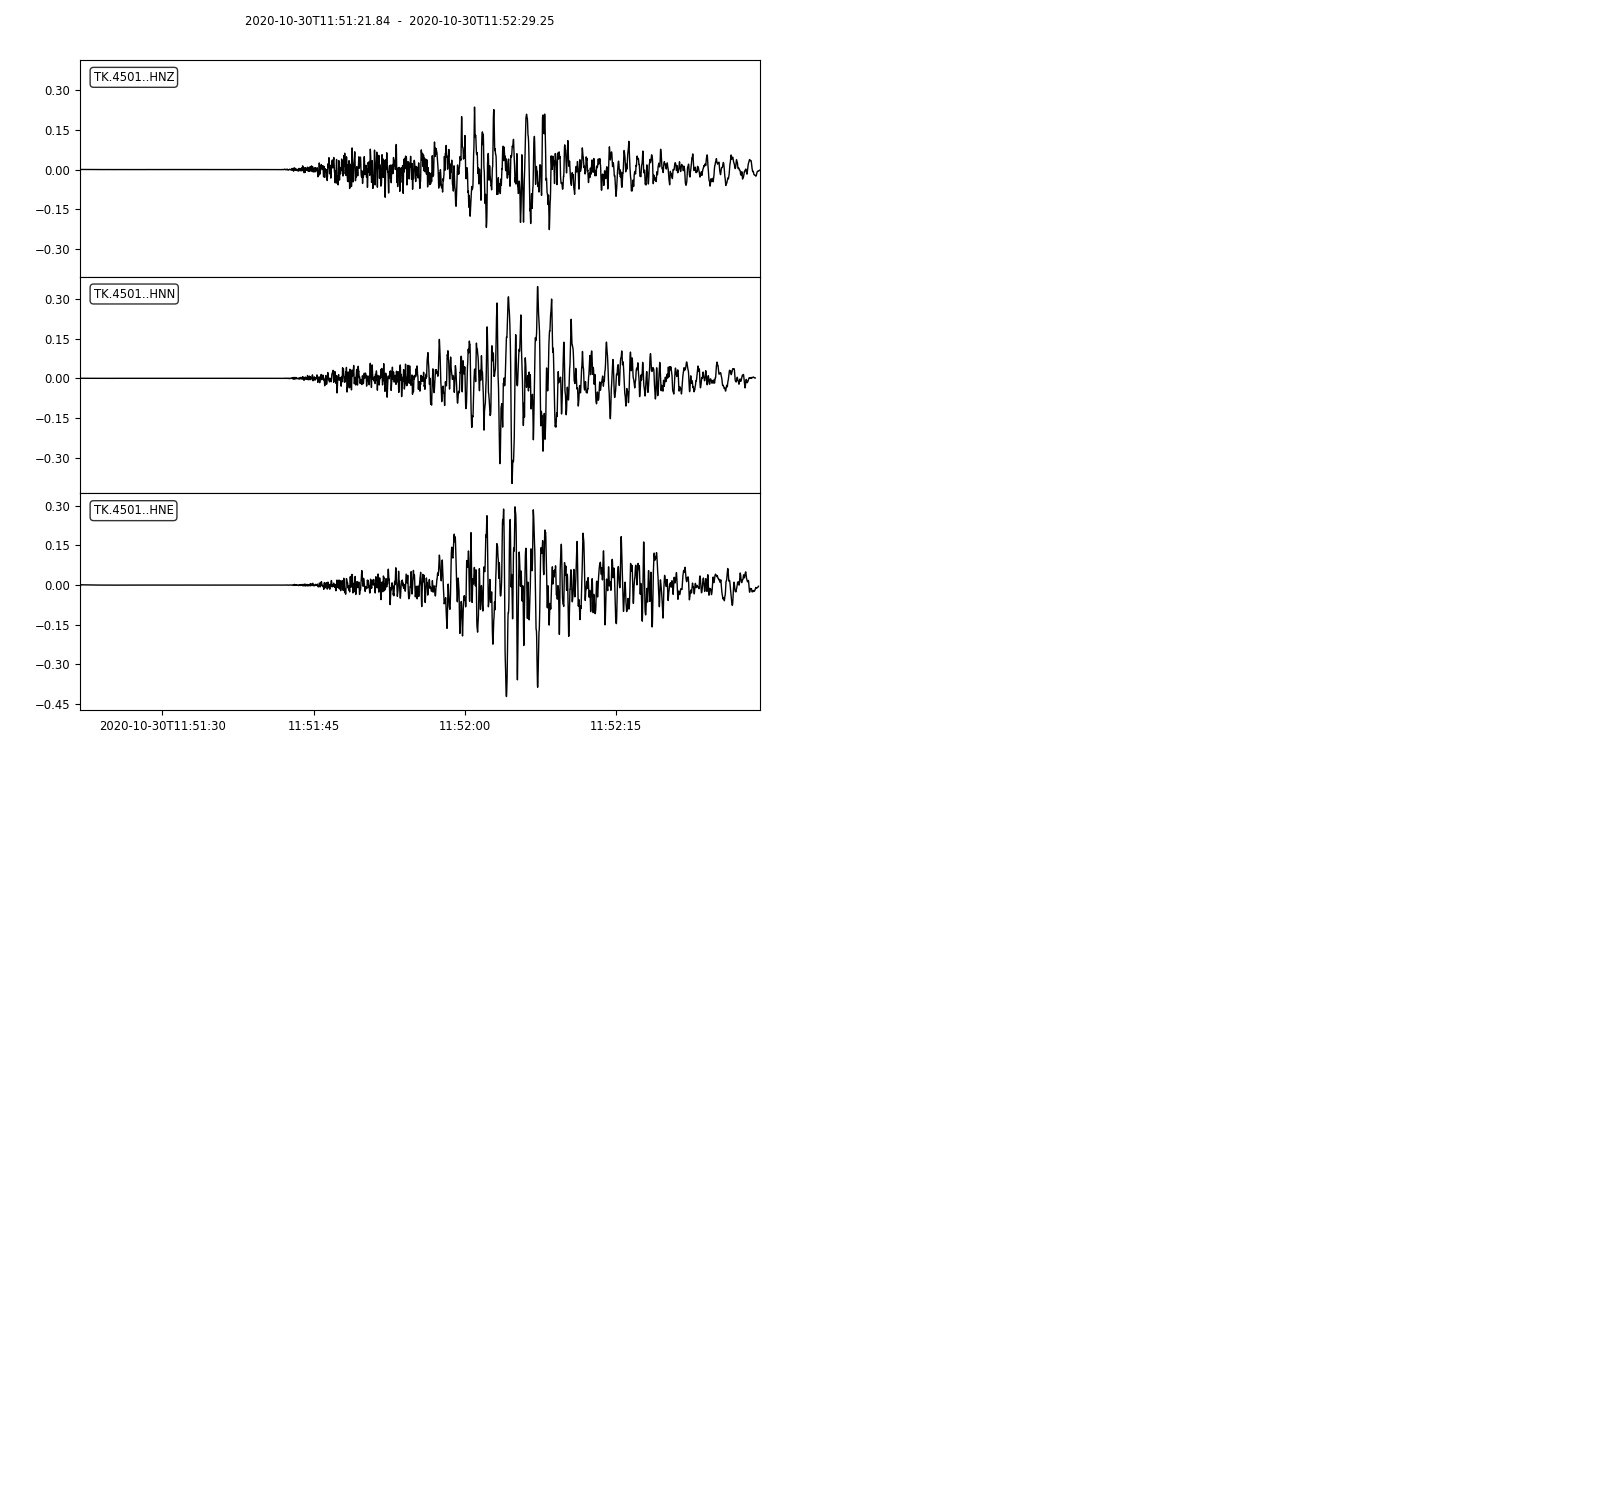

<IPython.core.display.Javascript object>


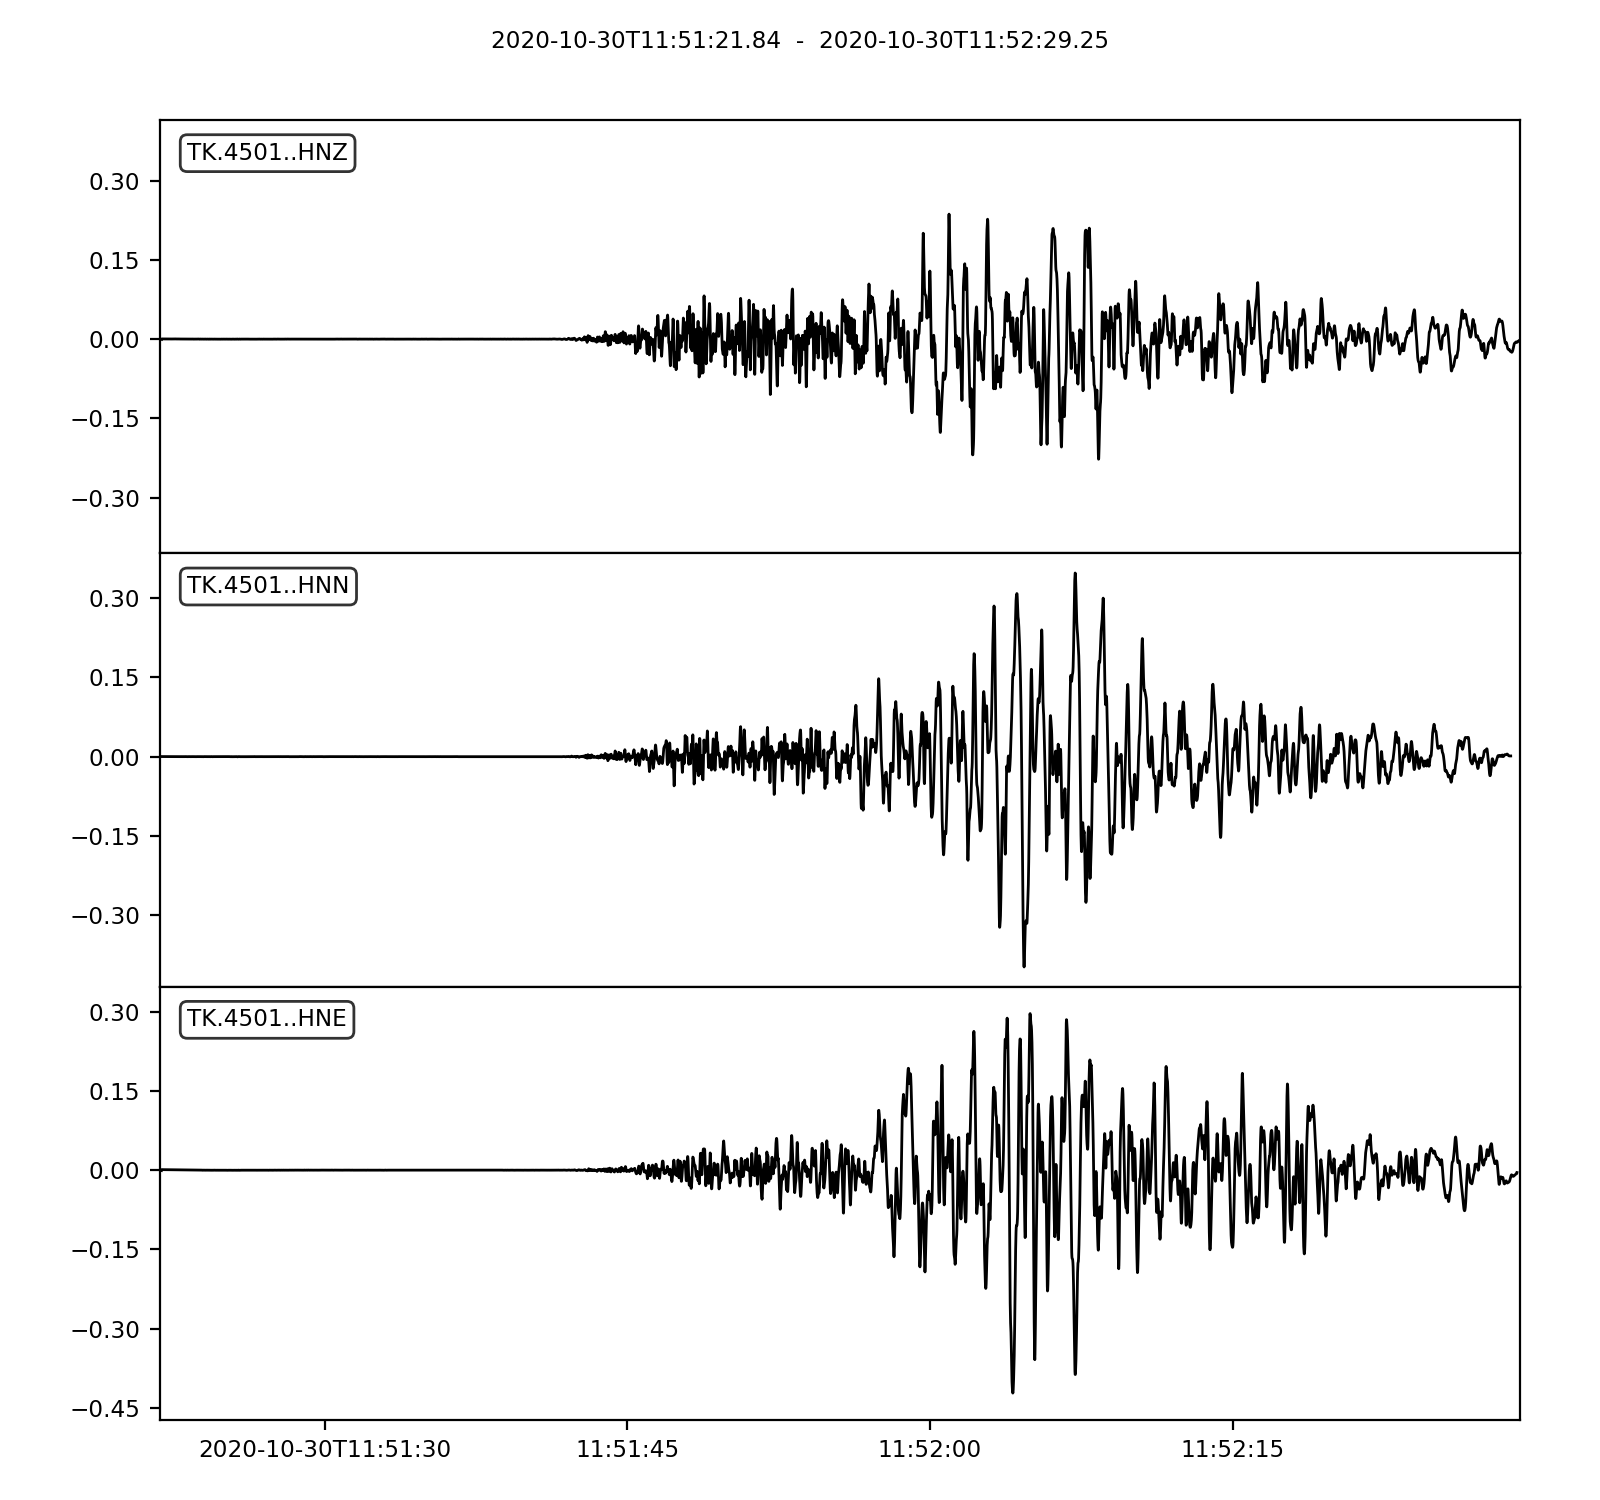

In [7]:
st_pro.plot()

In [11]:
#fin